In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
c = cast[(cast.character=="Superman") | (cast.character =="Batman")]
d = c.groupby(['year', 'character']).size().unstack('character').fillna(0)
d[d.Superman > d.Batman]

character,Batman,Superman
year,,
1948,0,1
1950,0,1
1951,0,2
1954,0,5
1955,0,1
1973,1,2
1978,0,2
1980,0,2
1983,0,2


In [7]:
len(d[d.Superman > d.Batman])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [8]:
c = cast[(cast.character=="Superman") | (cast.character =="Batman")]
d = c.groupby(['year', 'character']).size().unstack('character').fillna(0)
d[d.Superman < d.Batman]

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1949,2,0
1953,2,0
1957,2,0
1965,1,0
1966,1,0
1967,1,0


In [9]:
len(d[d.Superman < d.Batman])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

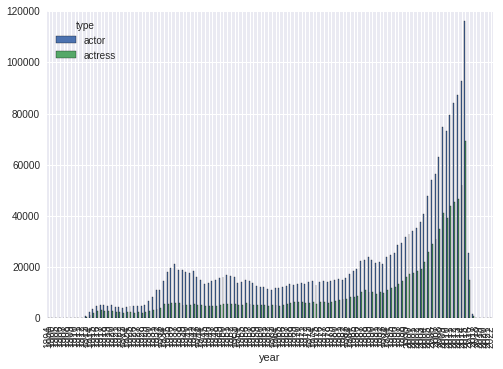

In [12]:
cast.groupby(['year', 'type']).size().unstack('type').fillna(0).plot(kind='bar')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

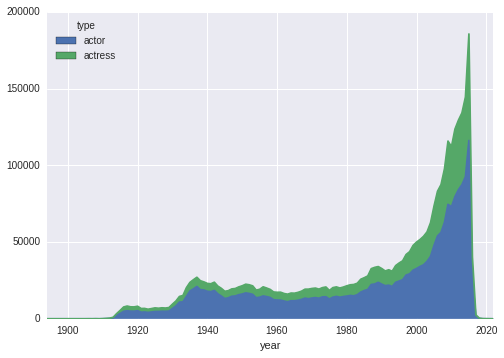

In [13]:
cast.groupby(['year', 'type']).size().unstack('type').fillna(0).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [22]:
c = cast.groupby(['year', 'type']).size().unstack('type').fillna(0)
c['diff'] = c['actor'] - c['actress']
c.head()

type,actor,actress,diff
year,,,
1894,2,1,1
1900,2,0,2
1905,1,0,1
1906,14,3,11
1907,5,0,5


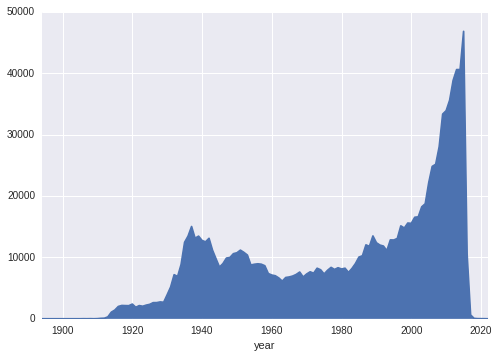

In [23]:
c['diff'].plot(kind = 'area')

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

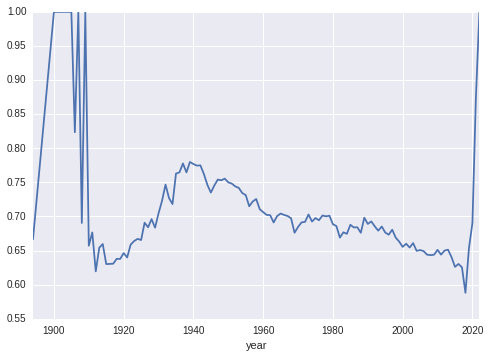

In [27]:
c['total'] = c['actor'] + c['actress']
(c['actor'] / c['total']).plot(kind='line')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

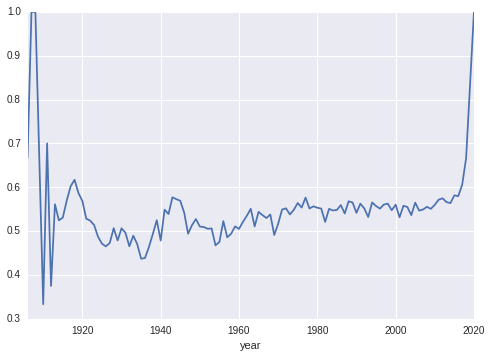

In [37]:
s = cast[cast.n == 2]
s1 = s.groupby(['year', 'type']).size().unstack('type').fillna(0)
(s1['actor'] / (s1['actor'] + s1['actress'])).plot(kind='line')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

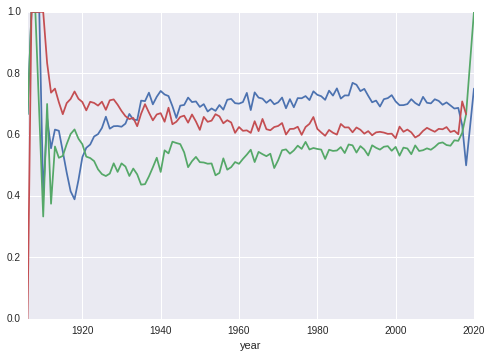

In [43]:
s1 = cast[cast.n == 1]
s1 = s1.groupby(['year', 'type']).size().unstack('type').fillna(0)
(s1['actor'] / (s1['actor'] + s1['actress'])).plot(kind='line')

s2 = cast[cast.n == 2]
s2 = s2.groupby(['year', 'type']).size().unstack('type').fillna(0)
(s2['actor'] / (s2['actor'] + s2['actress'])).plot(kind='line')

s3 = cast[cast.n == 3]
s3 = s3.groupby(['year', 'type']).size().unstack('type').fillna(0)
(s3['actor'] / (s3['actor'] + s3['actress'])).plot(kind='line')